### Explanation of the Code

1. **Define Cluster Centers**  
   The `cluster_centers` array defines RGB points representing clusters, with colors: red, green, blue, and yellow.

2. **Generate Random Data for Each Cluster**
   - The `np.random.normal` function generates points around each center with a spread (standard deviation) of `0.2`.
   - The number of points per cluster is defined by the `n_samples` list.

3. **Normalize Data**
   - After generating all clusters, the data is normalized to fall between 0 and 1. This ensures that the RGB values are within a valid range for color representation.

4. **Save Data to CSV**
   - The normalized data is saved as `test_data.csv` with columns labeled `X`, `Y`, and `Z`.

5. **3D Plot of the Data**
   - The data is visualized in a 3D scatter plot, with each point colored according to its normalized RGB values. This visualization helps to see the clustering structure in RGB space.


Generated data saved to 'test_data.csv'


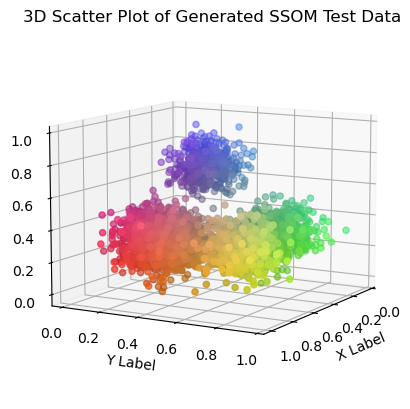

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Dec  6 18:57:06 2023
Updated for SSOM test data generation and visualization

Generates a synthetic dataset for testing a Self-Organizing Map (SSOM),
saving the data to a CSV file and visualizing it in a 3D plot.
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Fixing random state for reproducibility
np.random.seed(19680801)

# Define the number of samples per cluster
n_samples = [2000, 500, 500, 500]

# Define the cluster centers in RGB space
cluster_centers = np.array([
    [0.99, 0.0, 0.0],   # Red
    [0.0, 0.95, 0.0],   # Green
    [0.0, 0.0, 0.95],   # Blue
    [1.0, 1.0, 0.0]     # Yellow
])

# Generate data with clusters around each defined center
data = []
for i, center in enumerate(cluster_centers):
    samples = np.random.normal(loc=center, scale=0.2, size=(n_samples[i], 3))
    data.append(samples)

# Concatenate all clusters into a single dataset
data = np.vstack(data)

# Normalize data to be between 0 and 1
data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))

# Save the generated data to a CSV file
pd.DataFrame(data_normalized, columns=["X", "Y", "Z"]).to_csv('test_data.csv', index=False)
print("Generated data saved to 'test_data.csv'")

# Plot the data in 3D space
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data_normalized[:, 0], data_normalized[:, 1], data_normalized[:, 2], c=data_normalized, marker='o')
ax.view_init(elev=10, azim=30)

# Set labels for axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("3D Scatter Plot of Generated SSOM Test Data")
plt.show()


### Usage with SSOM

Once the synthetic test data has been generated and saved as `test_data.csv`, it can be loaded and used to train the `SSOM` model.

In [2]:
import pandas as pd
from ssom import SSOM
# Load the generated test data
data = pd.read_csv('test_data.csv').values

# Assuming SSOM is defined and imported correctly
som = SSOM(grid_size=(50, 50), num_iterations=5000, grid_shape="2D")
som.train(data)

SSOM Initial Settings:
  Grid Shape: 2D
  Grid Size: 50x50
  Number of Iterations: 5000
  Max Learning Rate: 0.1
  Learning Decay: 0.25
  Neighborhood Decay: 0.5
  Metric: euclidean
  Log Interval: 50

Initialized SOM grid with random weights.
Iter 5000/5000 [==================================================]  LearnRate: 0.0018


### Explanation of the Code

1. **Temporary Directory for Frames**:
   - `temp_som_frames` stores each frame as a `.png` file. These frames will be combined into a GIF and then deleted.

2. **Plot Each Historical SOM Grid as a Color Map**:
   - For each grid in `som.som_grid_history`, a color map is created using `plt.imshow`.
   - The normalized RGB values ensure valid colors for visualization.
   - Each plot is saved as a `.png` in the temporary directory.

3. **Create GIF**:
   - Using `PIL`, the frames are loaded and saved as a GIF.
   - `duration=300` controls the speed of the animation (300 milliseconds per frame).
   - `loop=0` allows the GIF to loop indefinitely.

4. **Cleanup**:
   - After creating the GIF, the temporary files are deleted to free up space.

### Usage

Simply call `plot_som_grid_as_colormap_gif(som)` with a trained `SSOM` instance that has `som_grid_history` and `step_history` populated. The GIF will be saved at `som_grid_evolution.gif`. This will visually capture the evolution of the `SOM` grid over time as a color-based map, which is great for understanding the training process.


/var/folders/y7/r3_l1bxn4sv6mkmyfgpt9n880000gn/T/ipykernel_86728/3718840475.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5, 5), dpi=100)  # Large enough to capture details


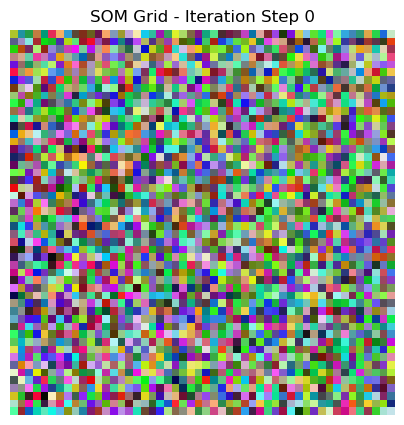

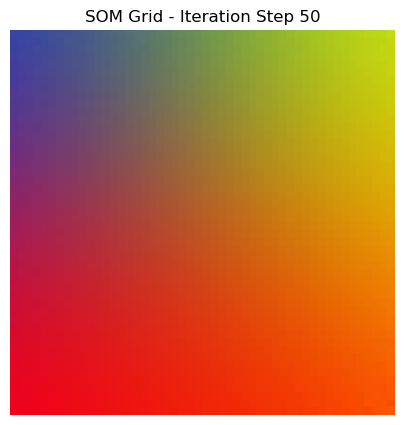

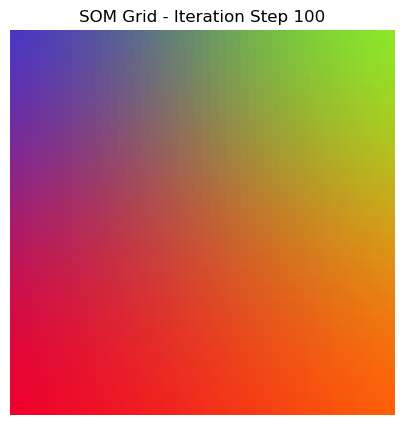

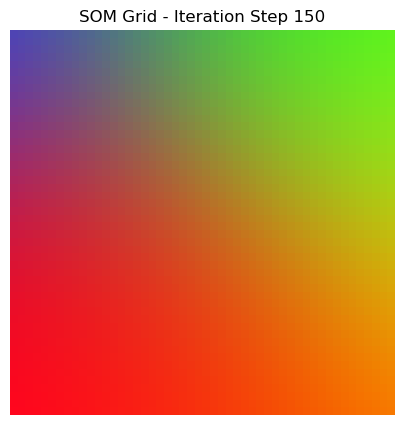

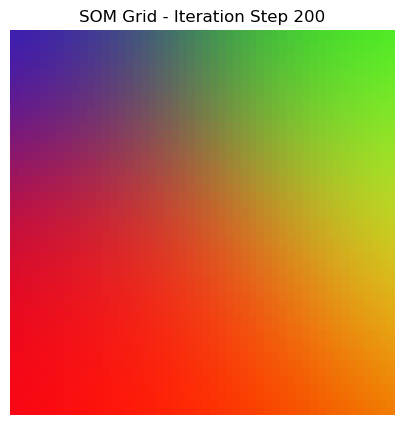

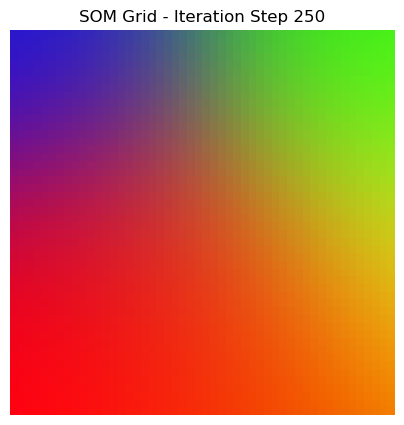

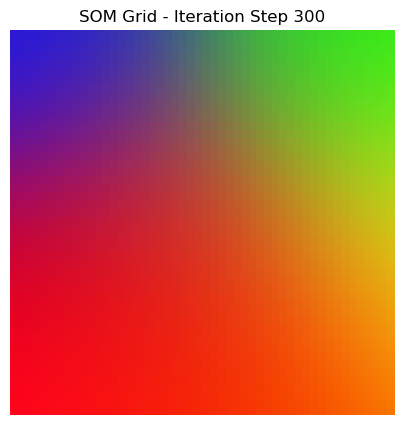

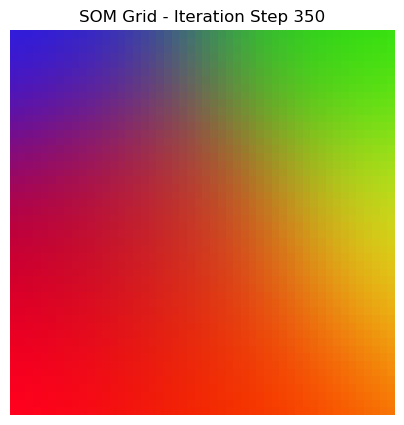

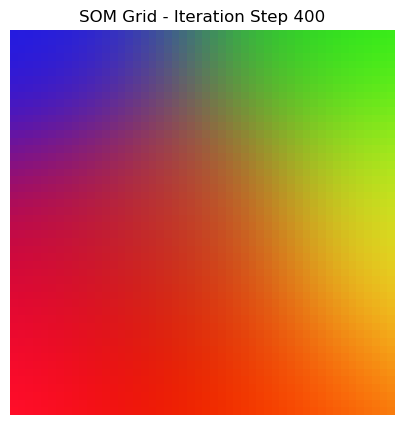

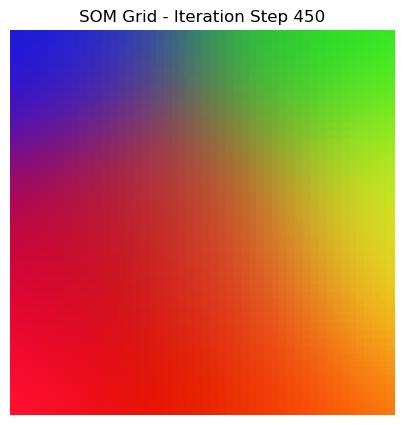

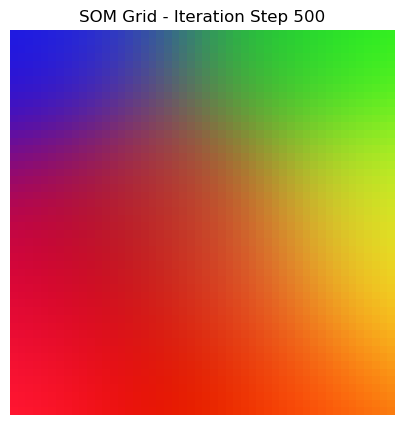

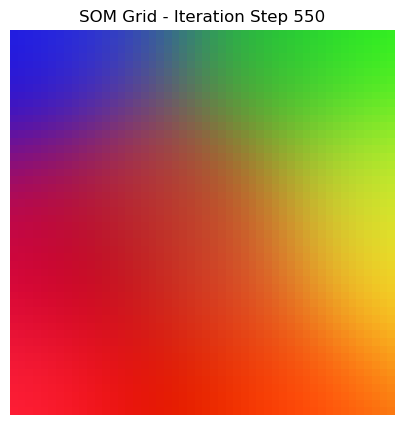

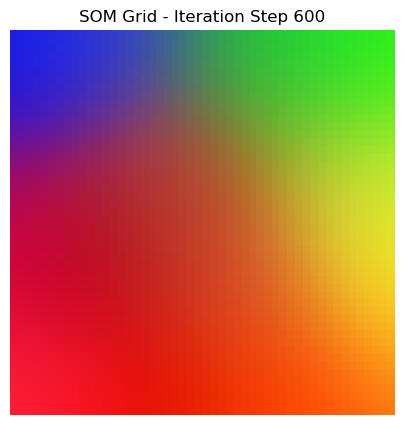

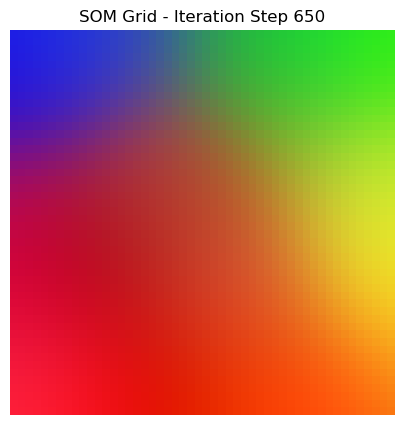

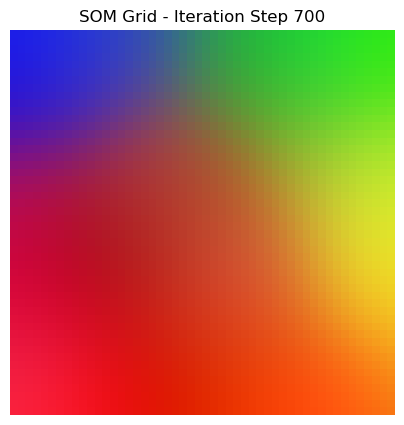

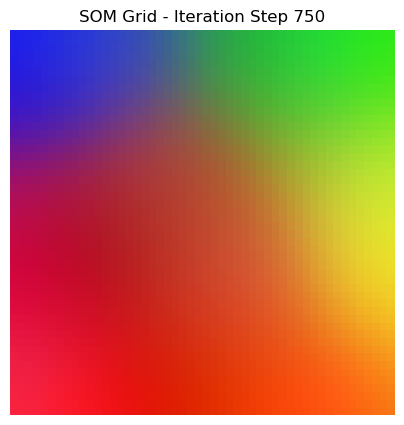

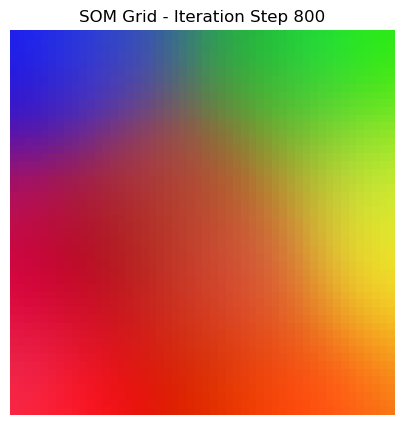

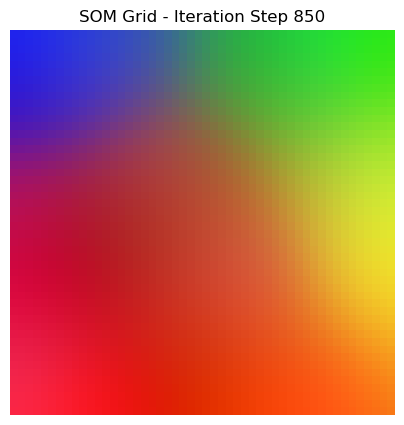

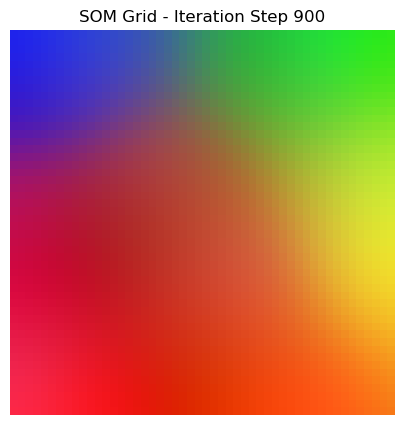

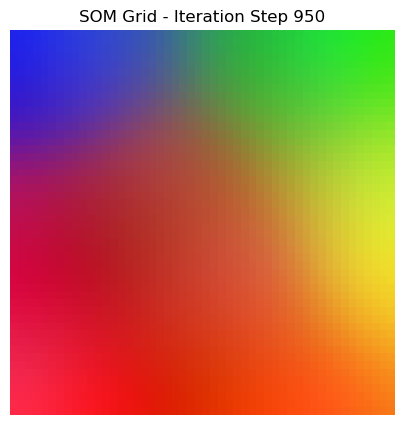

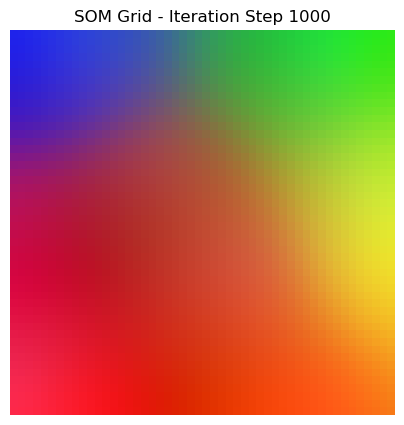

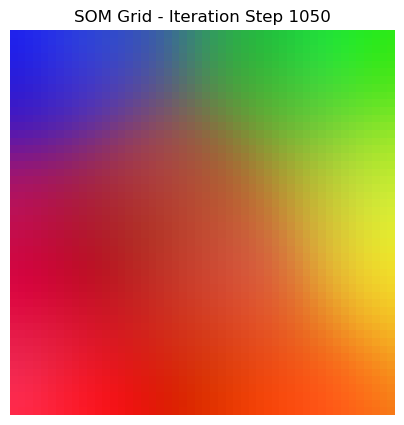

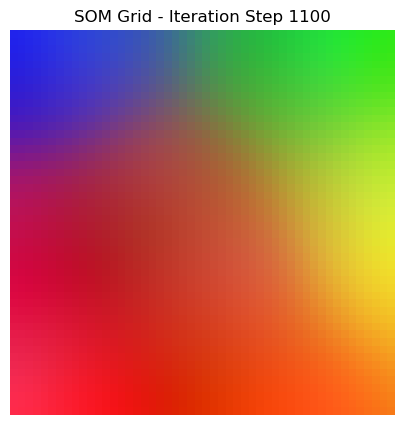

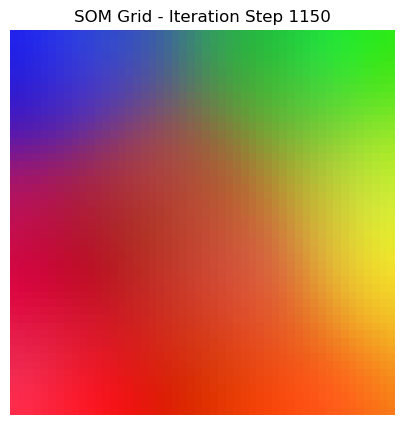

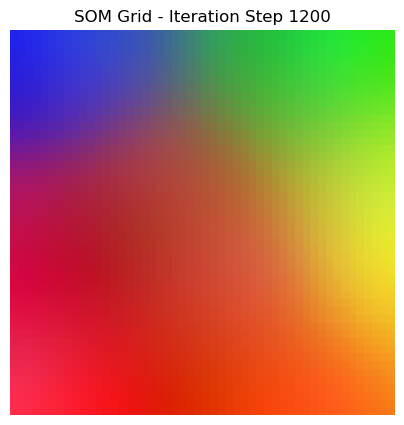

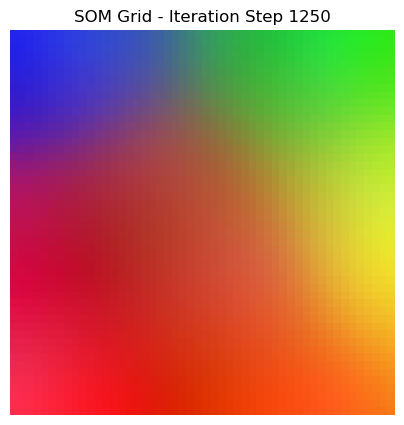

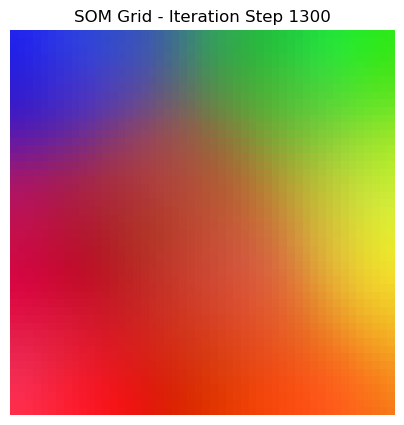

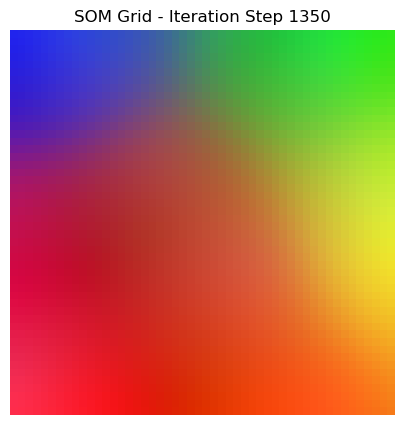

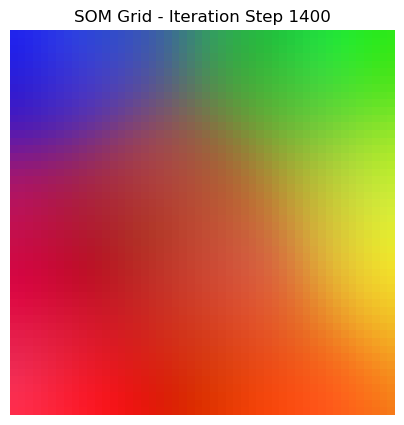

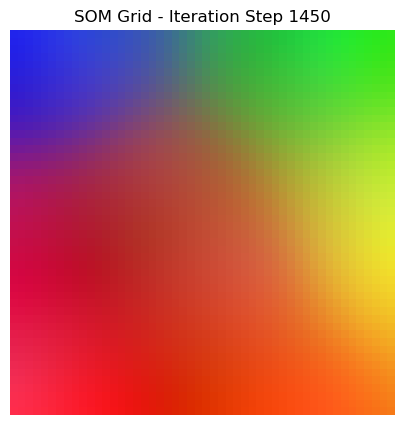

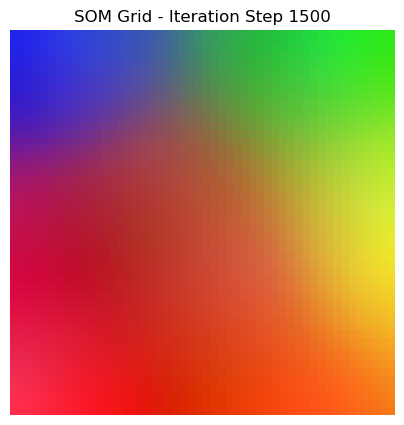

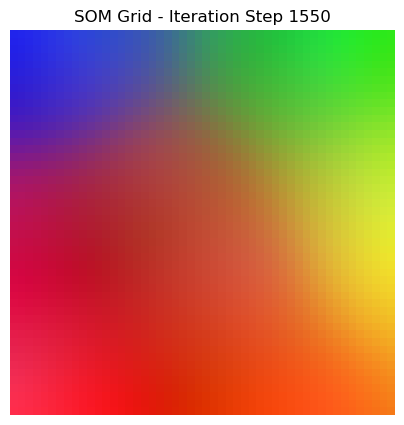

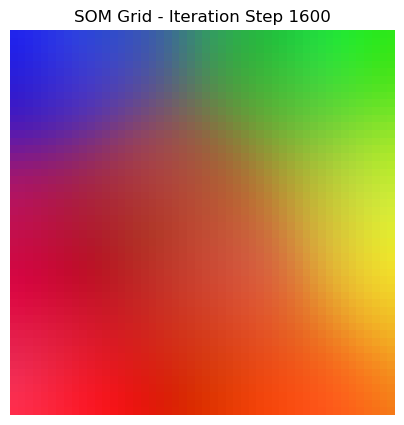

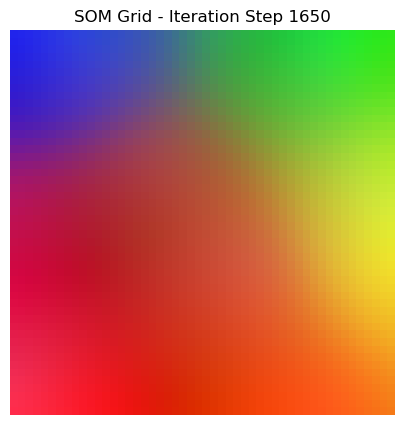

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Create a temporary directory to store images
temp_dir = "fig_2Drgb"
os.makedirs(temp_dir, exist_ok=True)
filenames = []

# Assuming `som` is a trained SSOM instance with history data
target_size = (100, 100)

# Loop through each historical grid state and save as an image
for i, som_grid in enumerate(som.som_grid_history[::3]):
    # Normalize the grid values to be between 0 and 1 for valid RGB colors
    normalized_grid = (som_grid - som_grid.min()) / (som_grid.max() - som_grid.min())

    # Plot the color map at any reasonable size, e.g., (300x300 pixels)
    fig, ax = plt.subplots(figsize=(5, 5), dpi=100)  # Large enough to capture details
    ax.imshow(normalized_grid)
    ax.axis('off')
    ax.set_title(f"SOM Grid - Iteration Step {som.step_history[i]}")

    # Save the frame as an image file
    frame_path = os.path.join(temp_dir, f"frame_{i}.png")
    plt.savefig(frame_path, bbox_inches="tight", pad_inches=0)
    filenames.append(frame_path)
    #plt.close(fig)

#gif_path = "som_grid_evolution.gif"
# Resize each frame to the target size and create GIF
#images = [Image.open(f).resize(target_size, Image.LANCZOS) for f in filenames]
#images[0].save(gif_path, save_all=True, append_images=images[1:], duration=300, loop=0)
#print(f"GIF created at: {gif_path}")



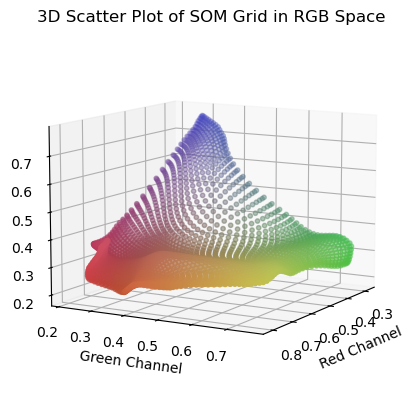

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure your SSOM instance has been trained and `som_grid` is populated
# Example:
# som = SSOM(grid_size=(10, 10), num_iterations=5000, grid_shape="2D")
# som.train(data)  # where `data` contains 3D RGB data

# Flatten the SOM grid for easy plotting in RGB space
grid_points = som.som_grid.reshape(-1, 3)

# Create the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot each point in the grid with its RGB color
ax.scatter(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], c=grid_points, marker='o', s=10)
ax.view_init(elev=10, azim=30)

# Set axis labels for RGB channels
ax.set_xlabel("Red Channel")
ax.set_ylabel("Green Channel")
ax.set_zlabel("Blue Channel")

# Add title
plt.title("3D Scatter Plot of SOM Grid in RGB Space")
plt.show()


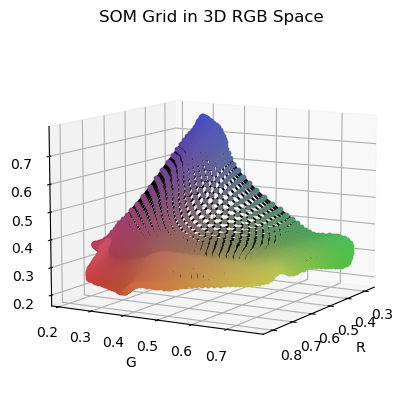

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_som_grid_in_3d(som):
    """
    Plot the SOM grid in 3D space, where each node represents a point in RGB color space.
    
    Parameters:
    - som: Trained SSOM instance with `som_grid` containing RGB nodes.
    """
    # Ensure the SOM is 2D with RGB nodes
    assert som.grid_shape == "2D" and som.som_grid.shape[-1] == 3, "SOM must be 2D with RGB nodes."

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("SOM Grid in 3D RGB Space")

    # Extract grid dimensions
    grid_rows, grid_cols, _ = som.som_grid.shape

    # Plot each node in 3D RGB space
    for row in range(grid_rows):
        for col in range(grid_cols):
            node = som.som_grid[row, col]
            ax.scatter(node[0], node[1], node[2], color=node, s=10)  # s=100 controls point size
            
            # Connect node to its right and bottom neighbors (if they exist)
            if col + 1 < grid_cols:
                neighbor_right = som.som_grid[row, col + 1]
                ax.plot([node[0], neighbor_right[0]], [node[1], neighbor_right[1]], [node[2], neighbor_right[2]], 'k-')
            if row + 1 < grid_rows:
                neighbor_bottom = som.som_grid[row + 1, col]
                ax.plot([node[0], neighbor_bottom[0]], [node[1], neighbor_bottom[1]], [node[2], neighbor_bottom[2]], 'k-')

    # Set labels
    ax.view_init(elev=10, azim=30)
    ax.set_xlabel("R")
    ax.set_ylabel("G")
    ax.set_zlabel("B")

    plt.show()

# Assuming `som` is a trained SSOM instance with a 2D RGB grid
plot_som_grid_in_3d(som)
